In [1]:
# 1.1 Import tensorflow and other libraries
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

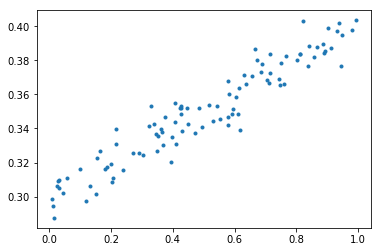

In [5]:
# 1.2 Create input data using NumPY. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Uncomment the following line to plot our inputdata
pylab.plot(x_data, y_data, '.')

In [9]:
# 1.3 Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Uncomment the following lines to see W and b are
print(W)
print(b)

Tensor("Variable_5/read:0", shape=(1,), dtype=float32)
Tensor("Variable_6/read:0", shape=(1,), dtype=float32)


In [10]:
# 1.4 Build training graph
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000000D269731A58>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable_5/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_6/ApplyGradientDescent"

name: "init"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"
input: "^Variable_4/Assign"
input: "^Variable_5/Assign"
input: "^Variable_6/Assign"



In [11]:
# 1.5 Uncomment the following line to see what we have built
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [14]:
# 1.6 Create a sesson and launch the graph
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

# Uncomment the following line to see the initial W and b values
print(sess.run([W, b]))

[array([ 0.62402523], dtype=float32), array([ 0.], dtype=float32)]


In [19]:
# 1.7 Perform training
for step in range(201):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

print("Parameters:")
print(sess.run([W, b]))

0 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
20 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
40 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
60 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
80 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
100 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
120 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
140 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
160 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
180 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
200 [array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]
Parameters:
[array([ 0.10117856], dtype=float32), array([ 0.29943287], dtype=float32)]


(0, 1.0)

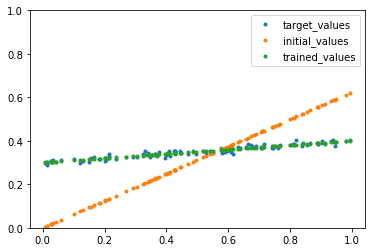

In [25]:
# 1.8 Uncomment the following lines to compare
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)

Back to [0_tf_hello_world.ipynb](0_tf_hello_world.ipynb).

Next to [2_mnist.ipynb](2_mnist.ipynb).